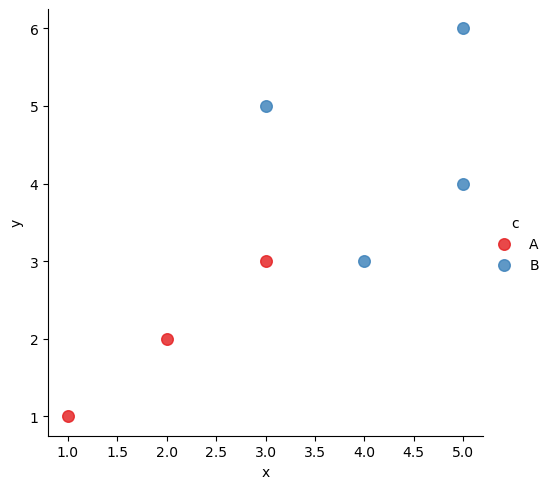

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("knn.csv")
sns.lmplot(x='x', y='y', data=data, hue='c', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.show()


In [6]:
def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance)

In [17]:
def knn(training_points, test_point, k): 
    distances = {}
    #---the number of axes we are dealing with---
    dimension = test_point.shape[1]
    #--calculating euclidean distance between each
    # point in the training data and test data
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
        #---record the distance for each training points---
        distances[x] = dist[0]

    #---sort the distances---
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))

    #---to store the neighbors---
    neighbors = []
    #---xtract the top k neighbors---
    for x in range(k):
        neighbors.append(sorted_d[x][0])

    #---for each neighbor found, find out its class---
    class_counter = {}
    for x in range(len(neighbors)):
        #---find out the class for that particular point---
        cls = training_points.iloc[neighbors[x]][-1]
        if cls in class_counter:
            class_counter[cls] += 1
        else: 
            class_counter[cls] = 1

    #---sort the class_counter in descending order---
    sorted_counter = sorted(class_counter.items(), key=operator.itemgetter(1), reverse=True)

    #---return the class with the most count, as well as the neighbors found 
    return sorted_counter[0][0], neighbors

In [26]:
import operator
#---test point---
test_set = [[3, 3.9]]
test = pd.DataFrame(test_set)
cls,neightbors = knn(data, test, 5)
print("Predicted Class: " + cls)

Predicted Class: B


k= 7
Class: B
Neighbors:
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
5  5  6  B
0  1  1  A
k= 5
Class: B
Neighbors:
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
k= 3
Class: B
Neighbors:
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
k= 1
Class: A
Neighbors:
   x  y  c
3  3  3  A


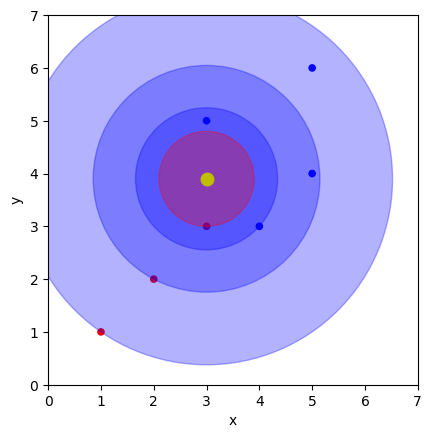

In [28]:
#---generate the color map for the scatter plot---
#---if column 'c' is A, then use Red, else use Blue---
colors = ['r' if i == 'A' else 'b' for i in data['c']]
ax = data.plot(kind='scatter', x='x', y='y', c=colors)
plt.xlim(0, 7)
plt.ylim(0, 7)

#---plot the test point---
plt.plot(test_set[0][0], test_set[0][1], "yo", markersize=9)

test_df = pd.DataFrame(test_set)
for k in range (7, 0, -2):
    cls, neighbors = knn(data, test_df, k)
    print("============")
    print("k=", k)
    print("Class:", cls)
    print("Neighbors:")
    print (data.iloc [neighbors])
    furthest_point = data.iloc [neighbors].tail(1)

    #---draw a circle connecting the test point and the furthest point---
    radius = euclidean_distance (test_df, furthest_point.iloc[0], 2)

    #---display the circle in red if classification is A, else display circle in blue---
    c = 'r' if cls == 'A' else 'b'
    circle = plt.Circle((test_set[0][0], test_set[0][1]), radius, color=c, alpha=0.3)
    ax.add_patch(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()